## importacion de dependencias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

### Creaciond el Dataframe

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

### Dividir el Dataframe en train y test

In [4]:
from sklearn.model_selection import train_test_split
x = df[[ 'Age', 'EstimatedSalary']]
y = df['Purchased']

x_train, x_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

Creacion del modelo

In [5]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=42)


In [6]:
model.fit(x_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Guardar las predicciones

In [7]:
Y_predict = model.predict(x_test)
Y_predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

### Imprimir metricas

In [8]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Precisión: {accuracy_score(Y_test, Y_predict) * 100:.2f}%")
print(classification_report(Y_test, Y_predict))


Precisión: 92.50%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120



### GRAFICAR

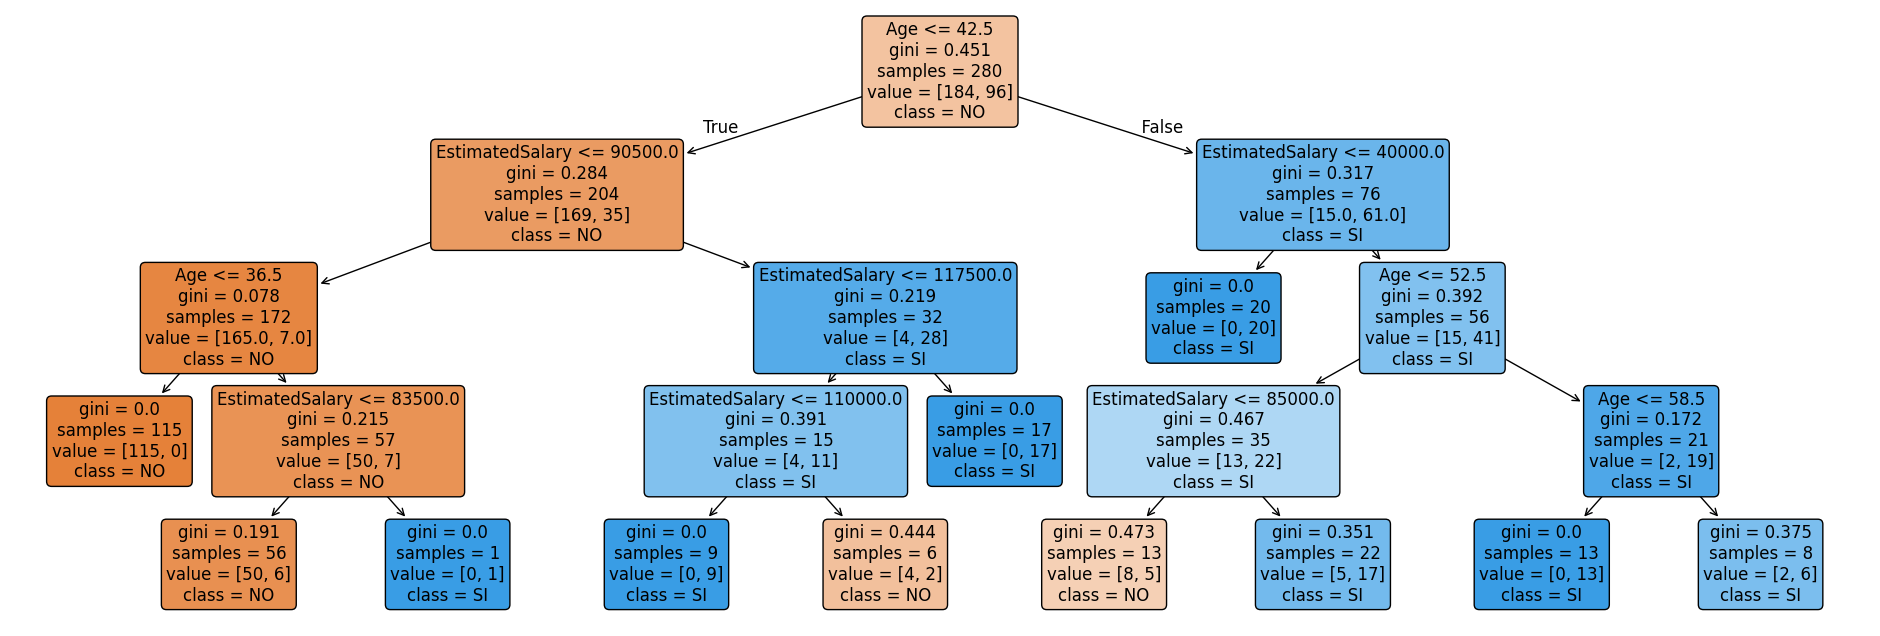

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(model, feature_names=x.columns, class_names=["NO","SI"],
filled=True, rounded=True, fontsize=12)
plt.show()